# Project 5

### Table of Contents

* [Problem Statement](#Problem-Statement)
* [Data Dictionary](#Data-Dictionary)
* [2019 Crash Data](#2019-Crash-Data)
* [2020 Crash Data](#2020-Crash-Data)

### Problem Statement 

Is there a day of the week and/or time of day that correlates to car crashes in Chicago?

<b> https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

### Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|

Imports

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 55)
sns.set_style(style='darkgrid')

### 2019 Crash Data

In [70]:
df_19 = pd.read_csv('data/Traffic_Crashes__Crashes_2019.csv')

In [71]:
df_19.shape

(117427, 49)

In [72]:
df_19.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf1ec97...,JC111663,NaN,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,2.0,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/10/2019 02:00:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
1,efa10cf15e9c7c9df8a9e946a85eda9836f66af895c98269e32...,JC100635,Y,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:10:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
2,0777b210b7a60ac1338d90e20520d421c3241971049303ff115...,JC100780,NaN,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,Y,"OVER $1,500",01/01/2019 02:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
3,caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982a8b3f...,JC100033,NaN,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,2.0,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"$501 - $1,500",01/01/2019 12:14:00 AM,IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
4,cb22668bf69d9c99e50c615a9ff996328190859a0e83510ce9a...,JC100171,NaN,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,1.0,STRAIGHT AND LEVEL,DRY,UNKNOWN,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2019 12:07:00 AM,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,NaN,NaN,NaN,NaN,NaN,NaN,3,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)


In [74]:
df_19.isnull().sum()

CRASH_RECORD_ID                       0
RD_NO                                 0
CRASH_DATE_EST_I                 108787
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                          98175
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                        3609
CRASH_TYPE                            0
INTERSECTION_RELATED_I            89521
NOT_RIGHT_OF_WAY_I               111617
HIT_AND_RUN_I                     84161
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


Dropping columns that are over 90% nulls.

In [75]:
df_19.drop(columns = ['PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 
                       'WORKERS_PRESENT_I', 'HIT_AND_RUN_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
                       'LANE_CNT', 'CRASH_DATE_EST_I'], inplace = True)

In [76]:
df_19.isnull().sum().sort_values()

CRASH_RECORD_ID                     0
CRASH_MONTH                         0
CRASH_DAY_OF_WEEK                   0
CRASH_HOUR                          0
NUM_UNITS                           0
BEAT_OF_OCCURRENCE                  0
STREET_NAME                         0
STREET_DIRECTION                    0
STREET_NO                           0
PRIM_CONTRIBUTORY_CAUSE             0
DATE_POLICE_NOTIFIED                0
DAMAGE                              0
CRASH_TYPE                          0
SEC_CONTRIBUTORY_CAUSE              0
ROAD_DEFECT                         0
ROADWAY_SURFACE_COND                0
ALIGNMENT                           0
TRAFFICWAY_TYPE                     0
RD_NO                               0
FIRST_CRASH_TYPE                    0
LIGHTING_CONDITION                  0
WEATHER_CONDITION                   0
DEVICE_CONDITION                    0
TRAFFIC_CONTROL_DEVICE              0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
INJURIES_UNK

Dropping 'INJURIES_UNKNOWN' since all values are 0.

In [77]:
df_19.drop(columns = ['INJURIES_UNKNOWN'], inplace = True)

Dropping irrelevant column.

In [78]:
df_19.drop(columns = ['REPORT_TYPE','RD_NO', 'DATE_POLICE_NOTIFIED'], inplace = True)

Filling in nulls with 0.

In [79]:
df_19['INJURIES_NO_INDICATION'].fillna('0', inplace = True)
df_19['INJURIES_REPORTED_NOT_EVIDENT'].fillna('0', inplace = True)
df_19['INJURIES_TOTAL'].fillna('0', inplace = True)
df_19['INJURIES_INCAPACITATING'].fillna('0', inplace = True)
df_19['INJURIES_FATAL'].fillna('0', inplace = True)
df_19['INJURIES_NON_INCAPACITATING'].fillna('0', inplace = True)

Filling nulls with 'NO INDICATION OF INJURY' for column 'MOST_SEVERE_INJURY' since that is the most common value and most likely to be the case if nothing was reported.

In [80]:
df_19['MOST_SEVERE_INJURY'].fillna('NO INDICATION OF INJURY', inplace = True)

Drop remaining null values.

In [81]:
df_19.dropna(inplace = True)

In [82]:
df_19.set_index('CRASH_RECORD_ID')

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_RECORD_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cb2b9a910babe20dfad7fc27c04c29e7b199fa94dc57bf1ec975a957bc3bed15dbb1ae68f991acc6273df8a7ed9bbdc3283992b1cb63908063ff1015d5d92d13,01/01/2019 12:00:00 AM,35,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1600,E,56TH ST,235,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.793502,-87.586407,POINT (-87.586406738035 41.793502271093)
efa10cf15e9c7c9df8a9e946a85eda9836f66af895c98269e3217db15893155d73f3446747cdf470f499834cef65949939862d6669d4abed67ccd65cdf3ad3f6,01/01/2019 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,3332,W,MAYPOLE AVE,1123,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.883685,-87.710043,POINT (-87.710042988194 41.883684713555)
0777b210b7a60ac1338d90e20520d421c3241971049303ff115a5c3c6eb799c42f9ed99080f86bace8bd8f665abaae3e9f3a94a49a86577e9bb81e43238bc0bf,01/01/2019 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1649,W,ADDISON ST,1922,2,NO INDICATION OF INJURY,0,0,0,0,0,1,0,3,1,41.946856,-87.670809,POINT (-87.67080913181 41.946856430289)
caa1629056b16f2e6ec6797d6252d6da8ec1142c0ee982a8b3fb3762cb72327b10b4c696562ab6f2859f615135f3a25b9d4358fe061ec576eaedc20a4b7e254c,01/01/2019 12:04:00 AM,20,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,ONE-WAY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER OVERTAKING/PASSING,DISREGARDING ROAD MARKINGS,188,W,MADISON ST,122,2,NO INDICATION OF INJURY,0,0,0,0,0,2,0,3,1,41.882058,-87.633478,POINT (-87.633478360366 41.882058104945)
cb22668bf69d9c99e50c615a9ff996328190859a0e83510ce9a0ee6cf0bde0842b500e781d2a81c105e0edfbf162e188c4bfb0d40d8af6a4dec7371e03d0333d,01/01/2019 12:07:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500","OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, N...",FAILING TO REDUCE SPEED TO AVOID CRASH,4054,N,MOBILE AVE,1624,3,NO INDICATION OF INJURY,0,0,0,0,0,5,0,3,1,41.954529,-87.784311,POINT (-87.784311465374 41.9545292855)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ad80bbbb1242b322a3c6097abe3823ed615b463873954b8356c6367f5e334a5830d75820cfa028dabe84ff3bffc299297996dcb82890183324b3a09812e287db,12/30/2019 11:13:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,BLOWING SNOW,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",DISREGARDING TRAFFIC SIGNALS,DISREGARDING TRAFFIC SIGNALS,3800,S,CALIFORNIA AVE,911,2,NONINCAPACITATING INJURY,1,0,0,1,0,1,23,2,12,41.824566,-87.694807,POINT (-87.69480737563 41.824566227681)
25e6e00fa4528a4aeb9922c47a7ed15c5e78d13b3aeba027faefe21451b4f36e1d1ace975d42cff796a1e1d5da3eca1806dd54d2dd55100a0d07a99e88908e78,12/30/2019 11:15:00 PM,30,UNKNOWN,UNKNOWN,SNOW,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,UNKNOWN,INJURY AND / OR 

Drop columns Latitude,longitude , location since the numerical values are not representative of magnitude or order

In [83]:
df_19.drop(columns = ['LATITUDE','LONGITUDE','LOCATION'], inplace = True)

Drop street number, direction and name - since they are unlikely to have an effect on crashes

In [84]:
df_19.drop(columns = ['STREET_NO','STREET_DIRECTION','STREET_NAME'], inplace = True)

Drop crash_date, since we have hour, day of week and month for aggregation

In [85]:
df_19.drop(columns = ['CRASH_DATE'], inplace = True)

In [86]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116510 entries, 0 to 117426
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CRASH_RECORD_ID                116510 non-null  object
 1   POSTED_SPEED_LIMIT             116510 non-null  int64 
 2   TRAFFIC_CONTROL_DEVICE         116510 non-null  object
 3   DEVICE_CONDITION               116510 non-null  object
 4   WEATHER_CONDITION              116510 non-null  object
 5   LIGHTING_CONDITION             116510 non-null  object
 6   FIRST_CRASH_TYPE               116510 non-null  object
 7   TRAFFICWAY_TYPE                116510 non-null  object
 8   ALIGNMENT                      116510 non-null  object
 9   ROADWAY_SURFACE_COND           116510 non-null  object
 10  ROAD_DEFECT                    116510 non-null  object
 11  CRASH_TYPE                     116510 non-null  object
 12  DAMAGE                         116510 non-nu

In [113]:
df_19['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        51836
DIVIDED - W/MEDIAN (NOT RAISED)    19079
ONE-WAY                            14938
PARKING LOT                         8093
DIVIDED - W/MEDIAN BARRIER          6763
FOUR WAY                            5874
OTHER                               2953
ALLEY                               1873
T-INTERSECTION                      1259
UNKNOWN                             1115
CENTER TURN LANE                     961
UNKNOWN INTERSECTION TYPE            422
DRIVEWAY                             421
RAMP                                 369
Y-INTERSECTION                       162
FIVE POINT, OR MORE                  155
TRAFFIC ROUTE                        125
NOT REPORTED                          52
ROUNDABOUT                            39
L-INTERSECTION                        21
Name: TRAFFICWAY_TYPE, dtype: int64

In [29]:
injury_cols = [col for col in df_19.columns if col.startswith('INJURIES')]
injury_cols

['INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION']

# Top 15 primary causes

In [87]:
known_cause = df_19[df_19['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']

In [88]:
known_cause = known_cause[known_cause['PRIM_CONTRIBUTORY_CAUSE'] != 'NOT APPLICABLE']

In [105]:
def cntplot_sorted_value_h(y,data,):
    plt.figure(figsize=(12,8))
    sns.countplot( y = y , 
                   data = data,
                  order = data[y].value_counts().index[:15]);


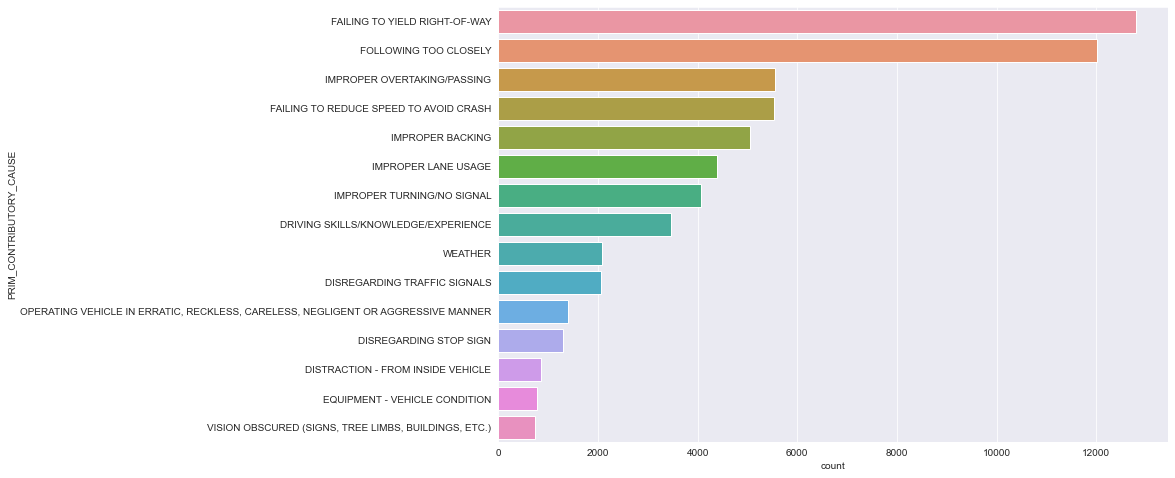

In [106]:
cntplot_sorted_value_h('PRIM_CONTRIBUTORY_CAUSE', known_cause)

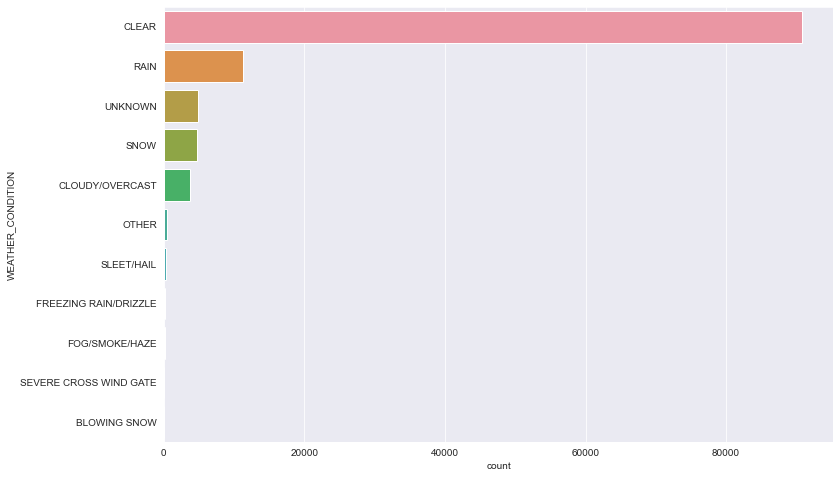

In [107]:
cntplot_sorted_value_h('WEATHER_CONDITION' , df_19)

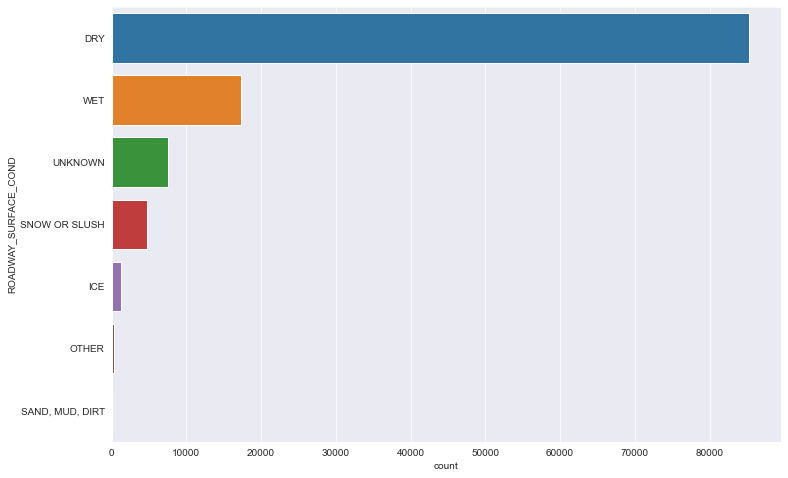

In [108]:
cntplot_sorted_value_h('ROADWAY_SURFACE_COND', df_19)

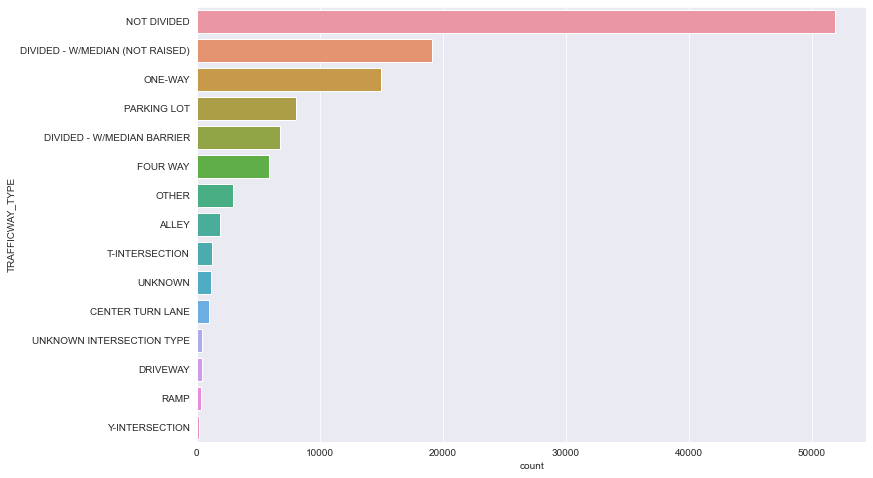

In [114]:
cntplot_sorted_value_h('TRAFFICWAY_TYPE', df_19)

In [98]:
def countplt( x , data):
    sns.countplot( x = x,
                 data = data);

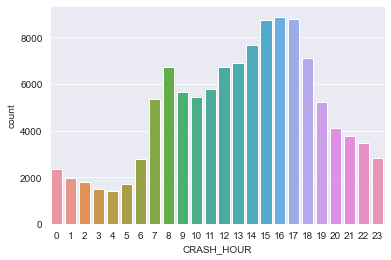

In [110]:
countplt('CRASH_HOUR', df_19)

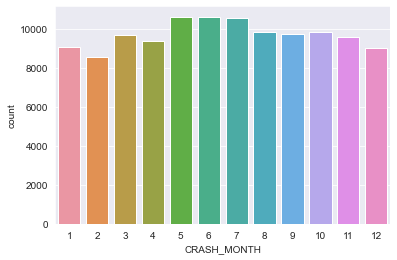

In [111]:
countplt('CRASH_MONTH', df_19)

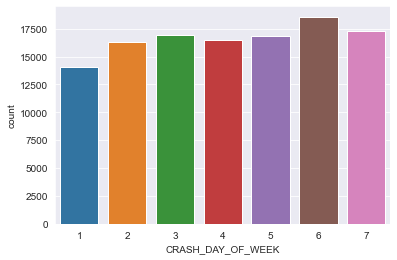

In [112]:
countplt('CRASH_DAY_OF_WEEK', df_19)

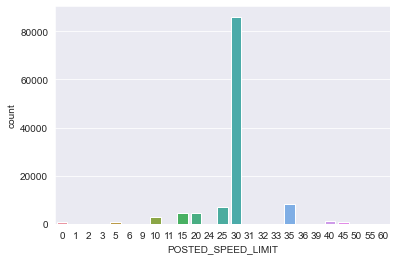

In [101]:
countplt('POSTED_SPEED_LIMIT' , df_19) 

### 2020 Crash Data

In [14]:
df_20 = pd.read_csv('Traffic_Crashes__Crashes_2020.csv')

In [15]:
df_20.shape

(91799, 49)

In [16]:
df_20.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,46c729dc548d987a50b9d9e7de6b019f28932a9deed1ed940b0...,JD100707,Y,01/01/2020 12:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2020 02:13:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,2300,S,PRINCETON AVE,914,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4,1,41.850888,-87.634906,POINT (-87.634906138716 41.850888274415)
1,d2d381e6650d777145ea1fb168b5e0afd8997aff1cd306d7f87...,JD100528,Y,01/01/2020 12:00:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",01/01/2020 11:06:00 AM,UNABLE TO DETERMINE,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,2526,W,BERTEAU AVE,1911,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4,1,41.957753,-87.692789,POINT (-87.692789246219 41.957752889821)
2,2cbd335f24e9309896f33cdda5f11799c209e564008b0eee20b...,JD100735,NaN,01/01/2020 12:01:00 AM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",01/01/2020 02:30:00 PM,NOT APPLICABLE,NOT APPLICABLE,1836,N,KILDARE AVE,2534,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4,1,41.914563,-87.733948,POINT (-87.733947769985 41.914562917838)
3,7dffbed0feecd57904759d6a8dc858afeec03dd784e2ee605f4...,JD100476,Y,01/01/2020 12:01:00 AM,25,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,FIXED OBJECT,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NaN,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,N,"OVER $1,500",01/01/2020 09:57:00 AM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,8040,S,SCOTTSDALE AVE,834,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4,1,41.746329,-87.738093,POINT (-87.738092787256 41.746329221922)
4,dc5df961f8f16fe9023d82cdd7b80b949eef13c10e60a0165dc...,JD100023,NaN,01/01/2020 12:10:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,ALLEY,NaN,STRAIGHT AND LEVEL,ICE,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",01/01/2020 12:10:00 AM,WEATHER,NOT APPLICABLE,4801,W,ARTHINGTON ST,1533,NaN,NaN,NaN,NaN,NaN,NaN,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,4,1,41.869246,-87.744963,POINT (-87.744962806496 41.869246030088)


In [17]:
df_20.isnull().sum()

CRASH_RECORD_ID                      0
RD_NO                                0
CRASH_DATE_EST_I                 84894
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
LANE_CNT                         91787
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       2592
CRASH_TYPE                           0
INTERSECTION_RELATED_I           69077
NOT_RIGHT_OF_WAY_I               87214
HIT_AND_RUN_I                    59981
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION         

Dropping columns that are over 90% nulls.

In [18]:
df_20.drop(columns = ['PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 
                       'WORKERS_PRESENT_I', 'HIT_AND_RUN_I', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
                       'LANE_CNT', 'CRASH_DATE_EST_I'], inplace = True)

Dropping 'INJURIES_UNKNOWN' since all values are 0.

In [19]:
df_20.drop(columns = ['INJURIES_UNKNOWN'], inplace = True)

Dropping irrelevant columns.

In [20]:
df_20.drop(columns = ['REPORT_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'DATE_POLICE_NOTIFIED'], inplace = True)

Filling in nulls with 0.

In [21]:
df_20['INJURIES_NO_INDICATION'].fillna('0', inplace = True)
df_20['INJURIES_REPORTED_NOT_EVIDENT'].fillna('0', inplace = True)
df_20['INJURIES_TOTAL'].fillna('0', inplace = True)
df_20['INJURIES_INCAPACITATING'].fillna('0', inplace = True)
df_20['INJURIES_FATAL'].fillna('0', inplace = True)
df_20['INJURIES_NON_INCAPACITATING'].fillna('0', inplace = True)

Filling nulls with 'NO INDICATION OF INJURY' for column 'MOST_SEVERE_INJURY' since that is the most common value and most likely to be the case if nothing was reported.

In [22]:
df_20['MOST_SEVERE_INJURY'].fillna('NO INDICATION OF INJURY', inplace = True)

Dropping remaining rows with nulls.

In [23]:
df_20.dropna(inplace = True)

### Exploratory Data Analysis

In [24]:
df_19.dtypes

CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
CRASH_TYPE                        object
DAMAGE                            object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION                  object
STREET_NAME                       object
BEAT_OF_OCCURRENCE                 int64
NUM_UNITS                          int64
MOST_SEVERE_INJURY                object
INJURIES_TOTAL                    object
INJURIES_FATAL                    object
INJURIES_INCAPACITATING           object
INJURIES_NON_INC

In [25]:
df_20.dtypes

CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
CRASH_TYPE                        object
DAMAGE                            object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION                  object
STREET_NAME                       object
BEAT_OF_OCCURRENCE                 int64
NUM_UNITS                          int64
MOST_SEVERE_INJURY                object
INJURIES_TOTAL                    object
INJURIES_FATAL                    object
INJURIES_INCAPACITATING           object
INJURIES_NON_INC

In [28]:
for i in df_19.columns:
    print(df_19[i].value_counts(ascending=False))

01/12/2019 02:30:00 PM    19
01/12/2019 03:00:00 PM    18
01/12/2019 02:00:00 PM    18
02/10/2019 02:00:00 PM    15
01/12/2019 04:00:00 PM    15
                          ..
07/28/2019 11:39:00 PM     1
12/21/2019 10:08:00 AM     1
06/03/2019 08:25:00 AM     1
09/22/2019 02:21:00 AM     1
12/16/2019 11:05:00 AM     1
Name: CRASH_DATE, Length: 73828, dtype: int64
30    86025
35     8131
25     7113
20     4590
15     4323
10     2684
40     1111
0       904
5       738
45      698
55       85
3        36
50       27
1         7
39        7
60        6
9         6
6         5
32        4
2         2
33        2
24        2
11        2
36        1
31        1
Name: POSTED_SPEED_LIMIT, dtype: int64
NO CONTROLS                 66498
TRAFFIC SIGNAL              32599
STOP SIGN/FLASHER           11765
UNKNOWN                      3884
OTHER                         763
YIELD                         176
OTHER REG. SIGN               163
LANE USE MARKING              139
OTHER WARNING SIGN      

0.0     106750
1.0       7537
2.0       1322
3.0        396
0          259
4.0        164
5.0         43
6.0         24
7.0          6
10.0         3
11.0         2
21.0         1
16.0         1
9.0          1
8.0          1
Name: INJURIES_NON_INCAPACITATING, dtype: int64
0.0     110725
1.0       4315
2.0        882
0          259
3.0        225
4.0         64
5.0         30
6.0          5
7.0          2
15.0         1
9.0          1
8.0          1
Name: INJURIES_REPORTED_NOT_EVIDENT, dtype: int64
2.0     53243
1.0     35078
3.0     15329
4.0      5949
5.0      2606
0.0      2161
6.0      1113
7.0       406
0         259
8.0       177
9.0        74
10.0       39
11.0       25
12.0       14
14.0        8
16.0        5
13.0        3
15.0        3
20.0        3
19.0        2
17.0        2
26.0        2
30.0        2
50.0        1
18.0        1
22.0        1
31.0        1
36.0        1
37.0        1
42.0        1
Name: INJURIES_NO_INDICATION, dtype: int64
16    8881
17    8778
15    8719
1

In [29]:
for i in df_20.columns:
    print(df_19[i].value_counts(ascending=False))

01/12/2019 02:30:00 PM    19
01/12/2019 03:00:00 PM    18
01/12/2019 02:00:00 PM    18
02/10/2019 02:00:00 PM    15
01/12/2019 04:00:00 PM    15
                          ..
07/28/2019 11:39:00 PM     1
12/21/2019 10:08:00 AM     1
06/03/2019 08:25:00 AM     1
09/22/2019 02:21:00 AM     1
12/16/2019 11:05:00 AM     1
Name: CRASH_DATE, Length: 73828, dtype: int64
30    86025
35     8131
25     7113
20     4590
15     4323
10     2684
40     1111
0       904
5       738
45      698
55       85
3        36
50       27
1         7
39        7
60        6
9         6
6         5
32        4
2         2
33        2
24        2
11        2
36        1
31        1
Name: POSTED_SPEED_LIMIT, dtype: int64
NO CONTROLS                 66498
TRAFFIC SIGNAL              32599
STOP SIGN/FLASHER           11765
UNKNOWN                      3884
OTHER                         763
YIELD                         176
OTHER REG. SIGN               163
LANE USE MARKING              139
OTHER WARNING SIGN      

2.0     53243
1.0     35078
3.0     15329
4.0      5949
5.0      2606
0.0      2161
6.0      1113
7.0       406
0         259
8.0       177
9.0        74
10.0       39
11.0       25
12.0       14
14.0        8
16.0        5
13.0        3
15.0        3
20.0        3
19.0        2
17.0        2
26.0        2
30.0        2
50.0        1
18.0        1
22.0        1
31.0        1
36.0        1
37.0        1
42.0        1
Name: INJURIES_NO_INDICATION, dtype: int64
16    8881
17    8778
15    8719
14    7653
18    7131
13    6892
8     6740
12    6727
11    5779
9     5633
10    5430
7     5348
19    5219
20    4112
21    3747
22    3484
23    2801
6     2768
0     2329
1     1970
2     1812
5     1688
3     1473
4     1396
Name: CRASH_HOUR, dtype: int64
6    18568
7    17287
3    16918
5    16883
4    16461
2    16299
1    14094
Name: CRASH_DAY_OF_WEEK, dtype: int64
5     10624
6     10586
7     10569
8      9848
10     9842
9      9715
3      9686
11     9566
4      9387
1      9084
12     